<a href="https://colab.research.google.com/github/maheshbangalkar/Case-Study/blob/main/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Yulu - Hypothesis Testing

- Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

- Storing a dataset into a varibale to perform operations

In [ ]:
data = pd.read_csv("bike_sharing.csv")

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


🎯 Dataset having total 10886 records

🎯 We could see there are total 12 columns - 11 numrical and 1 categorical

🎯 season, weather are categorical column, we need to convert it

In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

🎯 No null records are available in dataset i.e. no missing values

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Based on the summary statistics for the numerical columns in the dataset we can observe that:

   - The number of bike rented varies significantly, with the lowest number being `1`, and the highest being `977`.
   - Temperature range from `0.82 to 41.00` degree celcius
   - Feeling temperature range from `0.76 to 45.45` degree celcius
   - Windspeed range from `7 to 57` km/h
   - Humidity range from `0 to 100` %

🎯 We can see there are outliers high in some columns

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

🎯 Converted the datatype of column to datetime datatype

In [ ]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

- We can see that datatypes of all columns in dataset

### Column Profiling

- As per dataset, columns and their description to understand

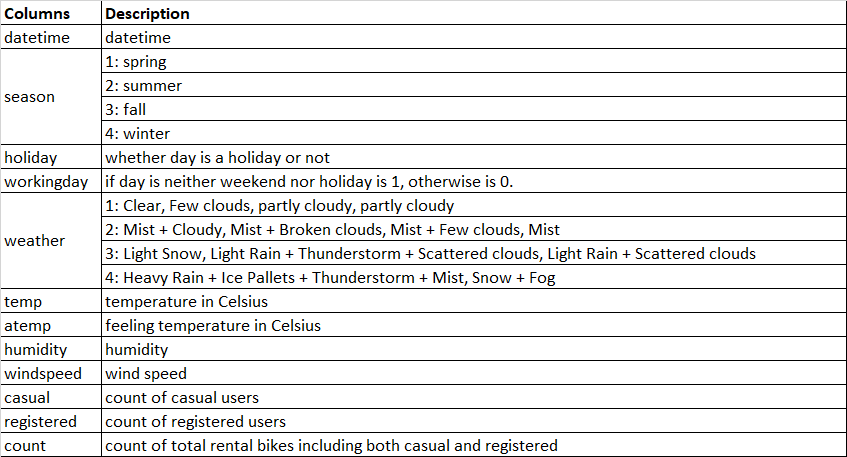

🎯 Converting the numerical columns weather and season to categorical with their categorical available values

In [ ]:
data['season'] = data['season'].map({1 : 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weather'] = data['weather'].map({1 : 'Clear, Few clouds, partly cloudy, partly cloudy',
                                       2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                       3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                       4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,0,1,1


In [ ]:
data.shape

(10886, 12)

🎯 After conversion of weather and season column there is no change is dataset onlt their values changed

In [ ]:
data.ndim

2

🎯 Given dataset is having 2 dimentions, as it is in form of rows and columns

In [ ]:
data.describe(include = 'object')

,season,weather
count,10886,10886
unique,4,4
top,winter,"Clear, Few clouds, partly cloudy, partly cloudy"
freq,2734,7192


Based on the above summary statistics we can observe that:

   - winter season is having more than other seasons by number in the dataset.
   - A significant proportion of season is winter (2734 out of 10886).
   - Clear, Few clouds, partly cloudy, partly cloudy weather is having more than other weathers by number in the dataset.
   - A significant proportion of weather is Clear, Few clouds, partly cloudy, partly cloudy (7192 out of 10886).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 1020.7+ KB


🎯 After modification in columns values as earlier total 12 columns - 9 numerical, 2 categorical and 1 durational column

🎯 "Numerical" columns in different variables

In [ ]:
data_num = data.select_dtypes(include = np.number)
data_num.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

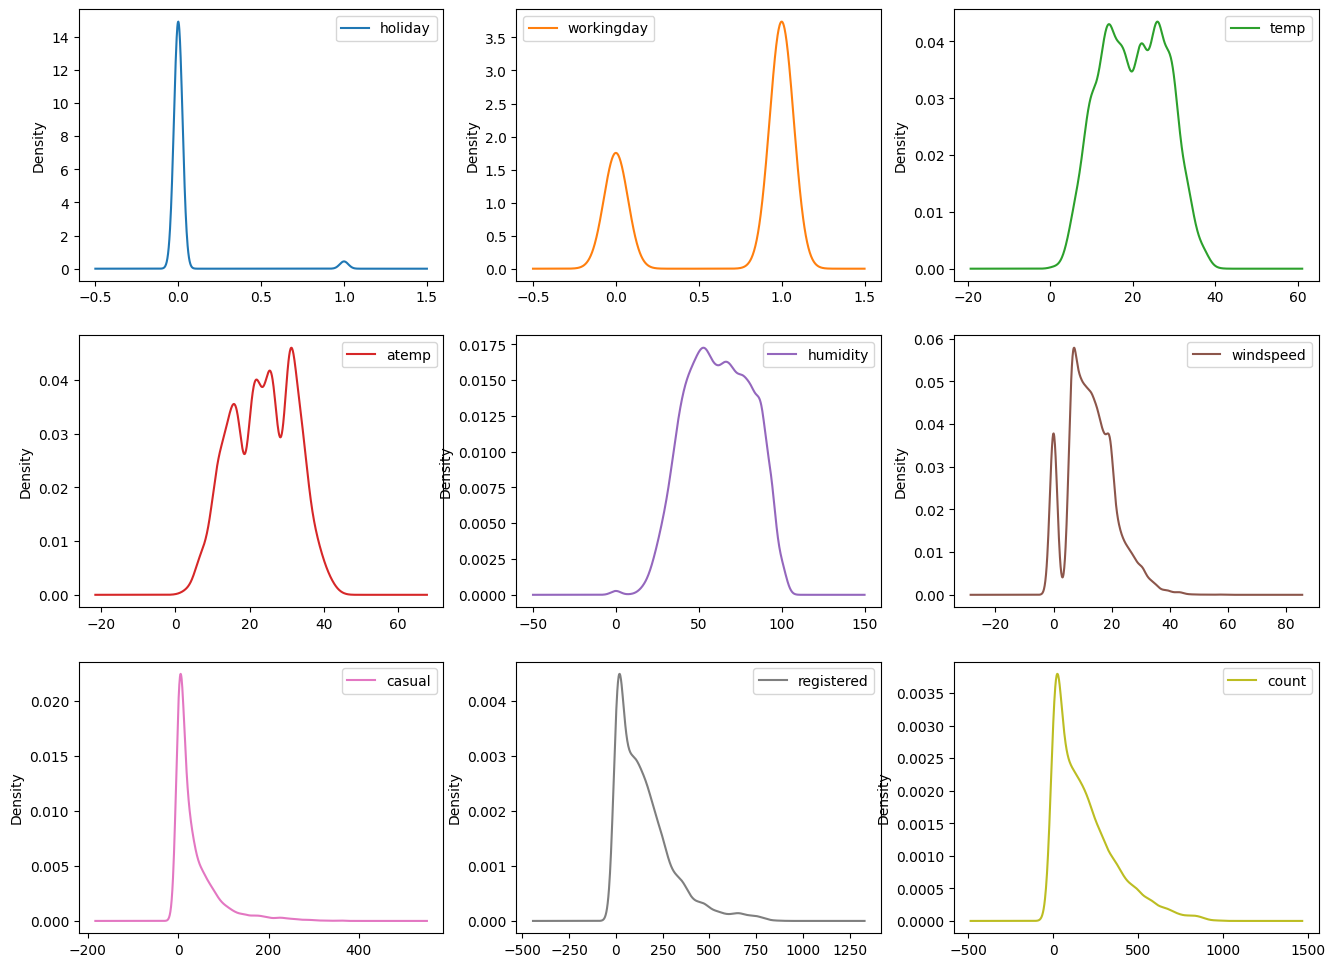

In [ ]:
plt.rcParams["figure.figsize"] = [16,12]
data_num.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

🎯 Skewness is a way to describe the shape of a data distribution or the pattern of how data points are spread out.

In [ ]:
print(data_num.skew().round(2))

holiday       5.66
workingday   -0.78
temp          0.00
atemp        -0.10
humidity     -0.09
windspeed     0.59
casual        2.50
registered    1.52
count         1.24
dtype: float64


##👍🏻 Rule of thumb :

>☝🏻 For skewness values between -0.5 and 0.5, the data exhibit approximate symmetry.

>👉🏻 Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1(positive skewed) indicate slightly skewed data distributions.

>👈🏻 Data with skewness values less than -1 (negative skewed) or greater than 1 (positive skewed) are considered highly skewed.

1. **Temperature, Feeling Temperature and Humidity:**
   -  These thress features have  data evenly spread on both sides of the center, it's like a hill with equal slopes on both sides. We call this "symmetrical" or "no skewness.

2. **Holiday, Casual, Registered and Count:**
   -  For this feature, most of the data is on the left side (lower values) and a long tail extends to the right (higher values), it's like a hill that's steeper on the left and has a long, gentle slope on the right.

3. **Working day and Windspeed:**
   - This feature has negative skewness. most of the data is on the right side (higher values) and a long tail extends to the left (lower values), it's like a hill that's steeper on the right and has a long, gentle slope on the left.

🎯 "Categorical" columns in different variables

In [ ]:
data_cat = data.select_dtypes(include = object)
data_cat.columns

Index(['season', 'weather'], dtype='object')

🎯 We could see, Two different categorical columns Season and Weather

In [ ]:
data['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

🎯 Different type of seasons are Spring, Summer, Fall, Winter

In [ ]:
data['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

🎯 Winter season having maximum values in number compare to other seasons.

🎯 Spring season with minimum values in number compare to other season.

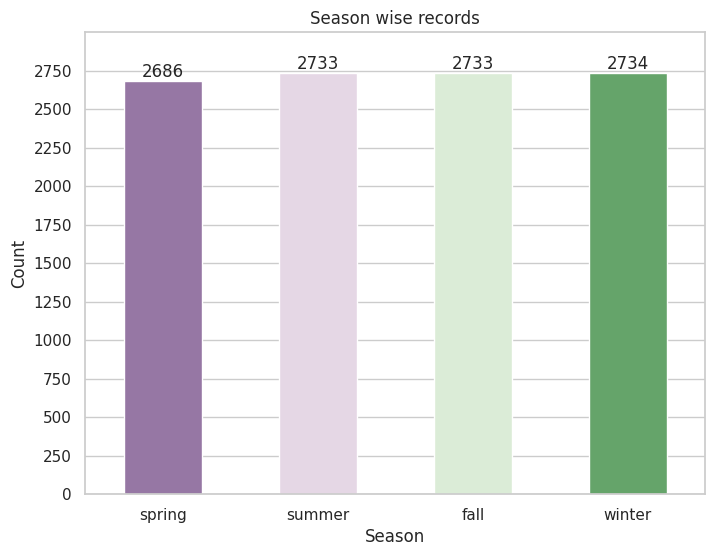

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'season', data = data, palette='PRGn', width=0.5)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Season wise records")
plt.xlabel('Season')
plt.ylabel('Count')
plt.ylim(0, 3000)
plt.yticks(np.arange(0, 3000, 250))
plt.show()

🎯 All season approximately having same number of entries in dataset

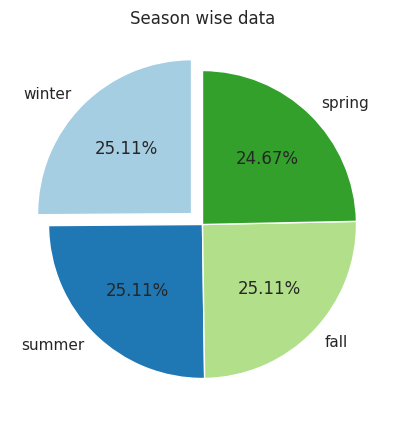

In [ ]:
data_pie = data['season'].value_counts().rename_axis('season').reset_index(name='season_count')
plt.figure(figsize=(5,5))
plt.pie(data_pie.season_count,
       labels=data_pie.season,
       startangle=90,
       explode=(0.1,0,0,0),
       autopct = '%.2f%%',
       colors=sns.color_palette('Paired'))
plt.title('Season wise data')
plt.show()

🎯 In dataset, Sping season is having less number of entries

In [ ]:
data['weather'].unique()

array(['Clear, Few clouds, partly cloudy, partly cloudy',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'],
      dtype=object)

🎯 Different types of Weather
  - Clear, Few clouds, partly cloudy, partly cloudy
  - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
data['weather'].value_counts()

Clear, Few clouds, partly cloudy, partly cloudy                                            7192
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               2834
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     859
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                    1
Name: weather, dtype: int64

🎯 We have totol 10886 entries, from which season wise in spring season electric share cycle used comparatively less than other season

🎯 In summer, fall, winter seasons electric share cycle uses are approximately same

🎯 When weather is Clear, Few clouds, partly cloudy, partly cloudy most of peoples approximately 66% prefers to use electric share cycles

🎯 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog none 0.01% peoples use

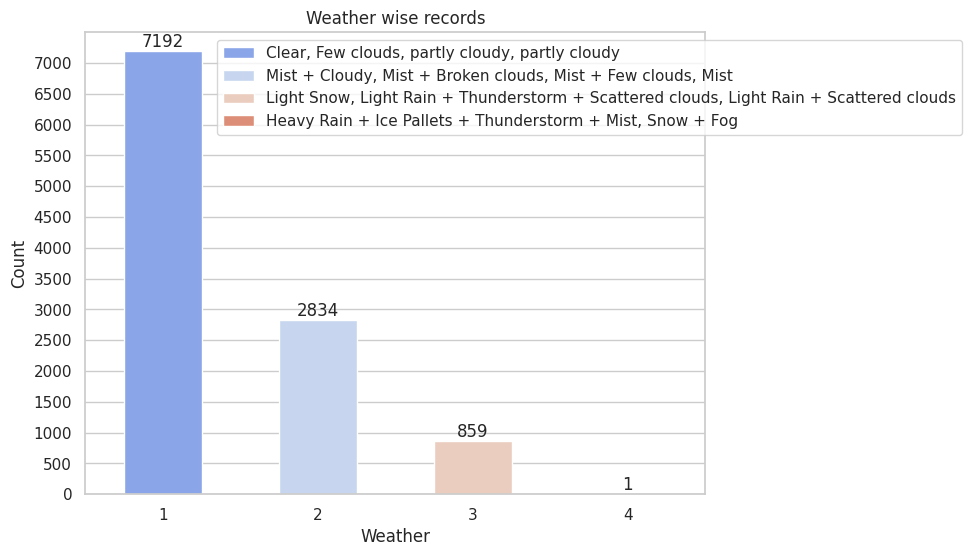

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'weather', data = data, palette='coolwarm', width=0.5)
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(0, 7500)
plt.yticks(np.arange(0, 7500, 500))
plt.title("Weather wise records")
columns = [1,2,3,4]
ax.set_xticklabels(columns)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(0.20, 1.0), loc='upper left', labels = data['weather'].unique())
plt.show()

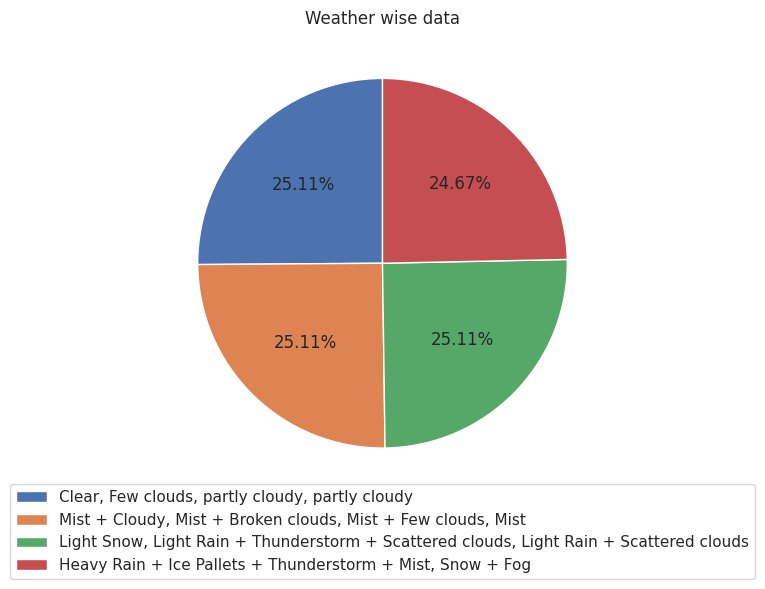

In [ ]:
plt.figure(figsize=(8,6))
labels = data['weather'].unique()
sizes = data['season'].value_counts()

plt.pie(sizes, autopct ='%.2f%%', startangle = 90)
plt.title('Weather wise data')
plt.legend(data['weather'].unique(), bbox_to_anchor =(0.5,-0.20), loc='lower center')
plt.show()

In [ ]:
print("Duration of entries in dataset from", data['datetime'].min(), "to", data['datetime'].max())
print("Duration of entries in days", data['datetime'].max() - data['datetime'].min())

Duration of entries in dataset from 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Duration of entries in days 718 days 23:00:00


🎯 We are having data from January 1, 2011 to December 19, 2012

🎯 Approximately 2 years data is available in dataset

In [ ]:
np.sum(data.duplicated()==True)

0

🎯 We could see there is no duplicate records available in dataset

In [ ]:
pd.crosstab(data["season"], data["holiday"])

holiday,0,1
season,,
fall,2637,96
spring,2615,71
summer,2685,48
winter,2638,96


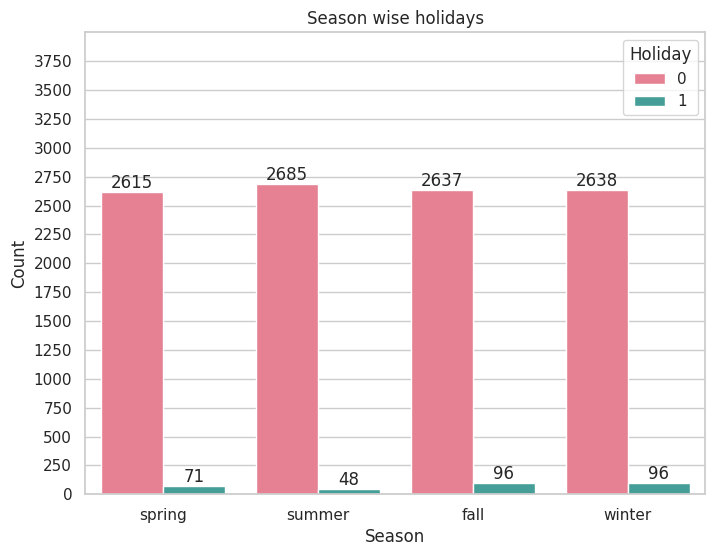

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x= data["season"],hue=data["holiday"], palette ='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(0, 4000)
plt.yticks(np.arange(0, 4000, 250))
plt.title("Season wise holidays")
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title = 'Holiday')
plt.show()

🎯 Fall and Winter season having more holiday, compare to Summer and Spring season those can be weekend or other holidays

🎯  Summer season having less holidays

In [ ]:
pd.crosstab(data["season"], data["workingday"])

workingday,0,1
season,,
fall,888,1845
spring,858,1828
summer,840,1893
winter,888,1846


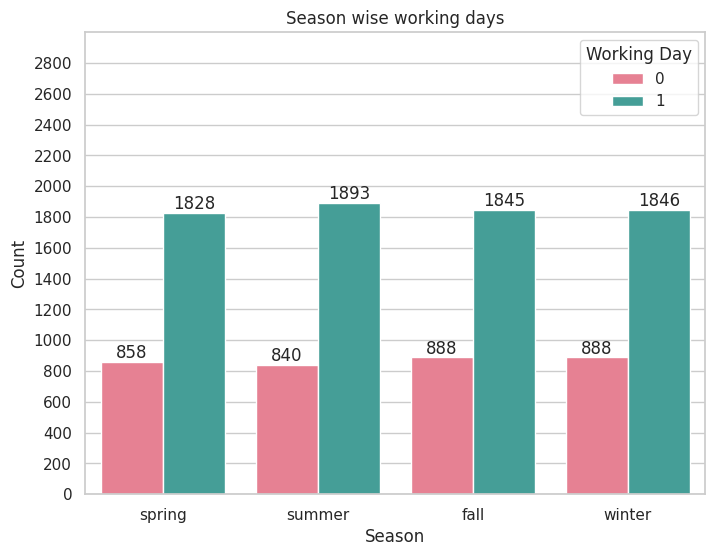

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x= data["season"],hue=data["workingday"], palette ='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(0, 3000)
plt.yticks(np.arange(0, 3000, 200))
plt.title("Season wise working days")
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title = 'Working Day')
plt.show()

🎯 Every season having approximately same working days

In [ ]:
pd.crosstab(data["weather"], data["holiday"])

holiday,0,1
weather,,
"Clear, Few clouds, partly cloudy, partly cloudy",6988,204
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",1,0
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",844,15
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",2742,92


#### Weather legend
- **1** : Clear, Few clouds, partly cloudy, partly cloudy
- **2** : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- **3** : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- **4** : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

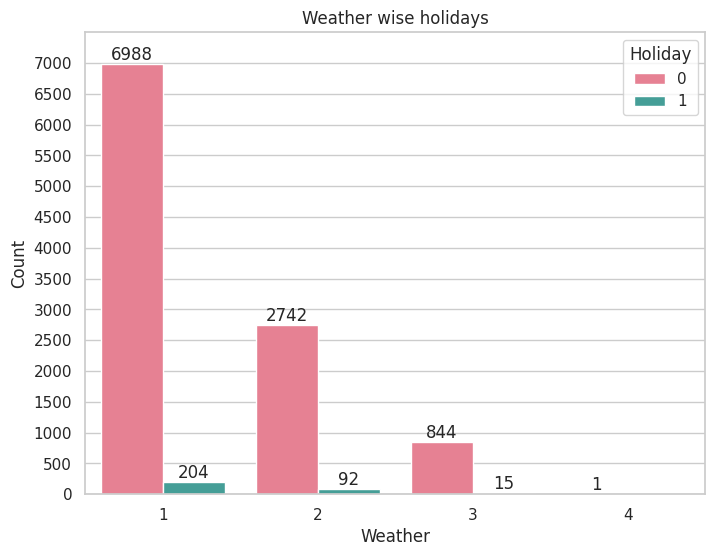

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x= data["weather"],hue=data["holiday"], palette ='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(0, 7500)
plt.yticks(np.arange(0, 7500, 500))
plt.title("Weather wise holidays")
columns = [1,2,3,4]
ax.set_xticklabels(columns)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.legend(title = 'Holiday')
plt.show()

🎯 When weather is Clear, Few clouds, partly cloudy, partly cloudy both Holiday and other days are more compare to other weather as per dataset.

In [ ]:
pd.crosstab(data["weather"], data["workingday"])

workingday,0,1
weather,,
"Clear, Few clouds, partly cloudy, partly cloudy",2353,4839
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",0,1
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",224,635
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",897,1937


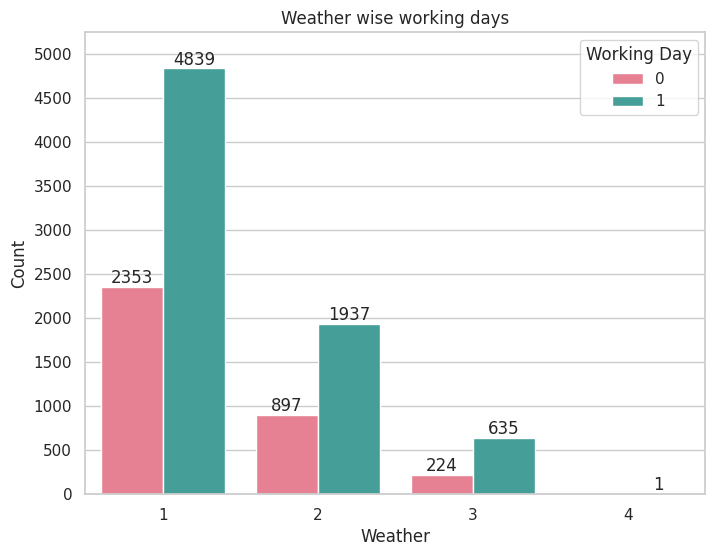

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x= data["weather"],hue=data["workingday"], palette ='husl')
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(0, 5250)
plt.yticks(np.arange(0, 5500, 500))
plt.title("Weather wise working days")
columns = [1,2,3,4]
ax.set_xticklabels(columns)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.legend(title = 'Working Day')
plt.show()

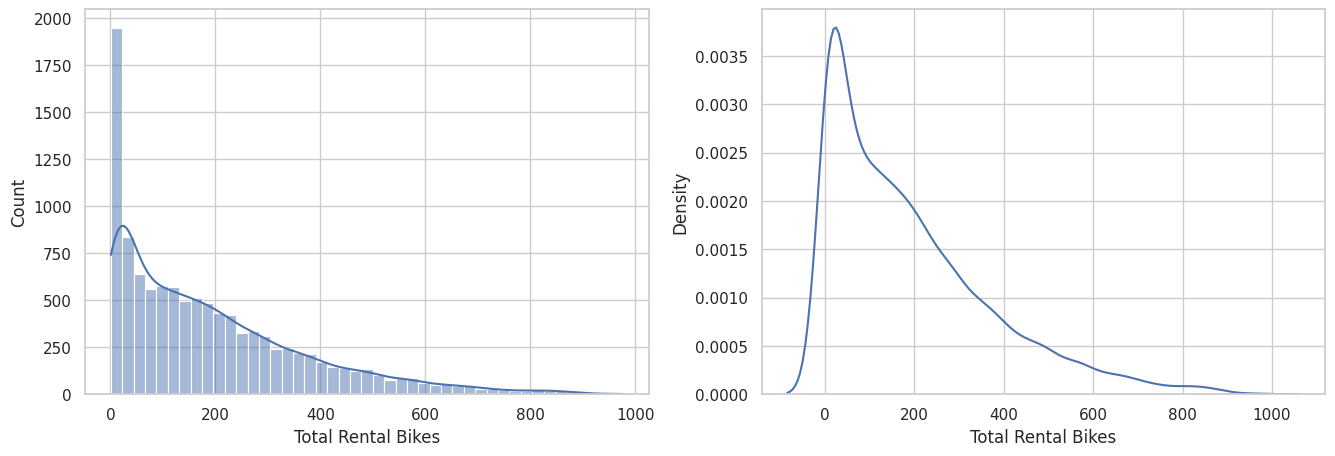

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data["count"], kde=True)
plt.xlabel('Total Rental Bikes')
plt.ylabel('Count')

plt.subplot(122)
sns.distplot(x = data['count'], hist=False)
plt.xlabel('Total Rental Bikes')
plt.ylabel('Density')
plt.show()

🎯 Histogram is telling us that data is right skewed means there are some users who are using rental bikes more than most of the users.

🎯 It can be inferred that most of the data in the distribution of count (total number of rental bikes) is towards the left which means it is not normally distributed.

- Binning : Creating a new column of year wise month based on datetime column

In [ ]:
data['year_month'] = data['datetime'].dt.strftime('%Y-%m')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year_month
0,2011-01-01 00:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,81,0.0,3,13,16,2011-01
1,2011-01-01 01:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,8,32,40,2011-01
2,2011-01-01 02:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,5,27,32,2011-01
3,2011-01-01 03:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,3,10,13,2011-01
4,2011-01-01 04:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,0,1,1,2011-01


In [ ]:
data.groupby("year_month")['count'].sum()

year_month
2011-01     23552
2011-02     32844
2011-03     38735
2011-04     50517
2011-05     79713
2011-06     89776
2011-07     92848
2011-08     83296
2011-09     79104
2011-10     79522
2011-11     70889
2011-12     61183
2012-01     56332
2012-02     66269
2012-03     94766
2012-04    116885
2012-05    120434
2012-06    130957
2012-07    121769
2012-08    130220
2012-09    133425
2012-10    127912
2012-11    105551
2012-12     98977
Name: count, dtype: int64

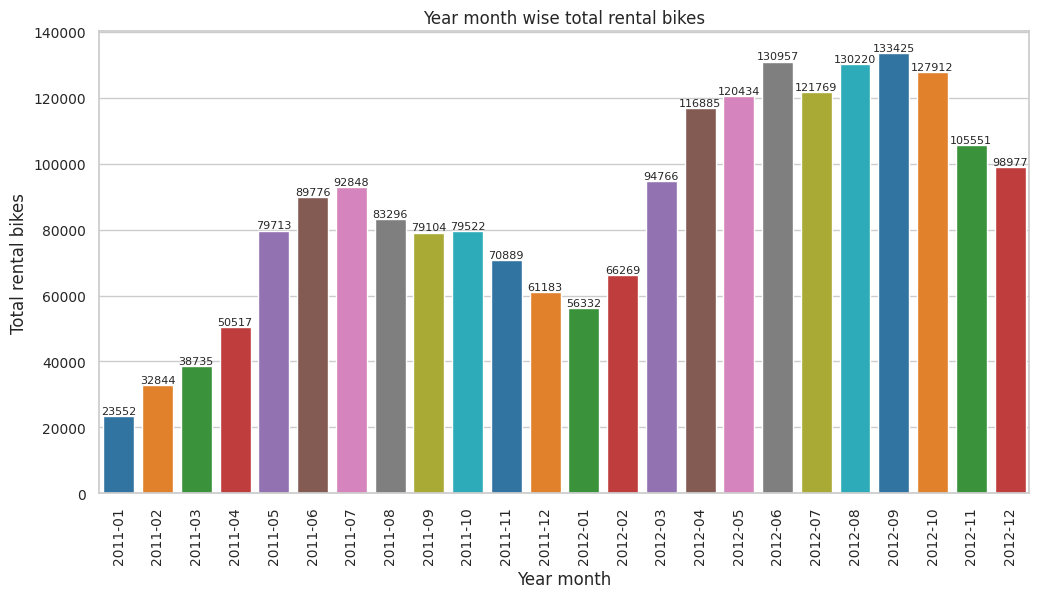

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=data.groupby("year_month")['count'].sum().index,
                 y=data.groupby("year_month")['count'].sum().values,
                 palette = 'tab10')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Year month wise total rental bikes")
plt.xlabel('Year month')
plt.ylabel('Total rental bikes')
plt.show()

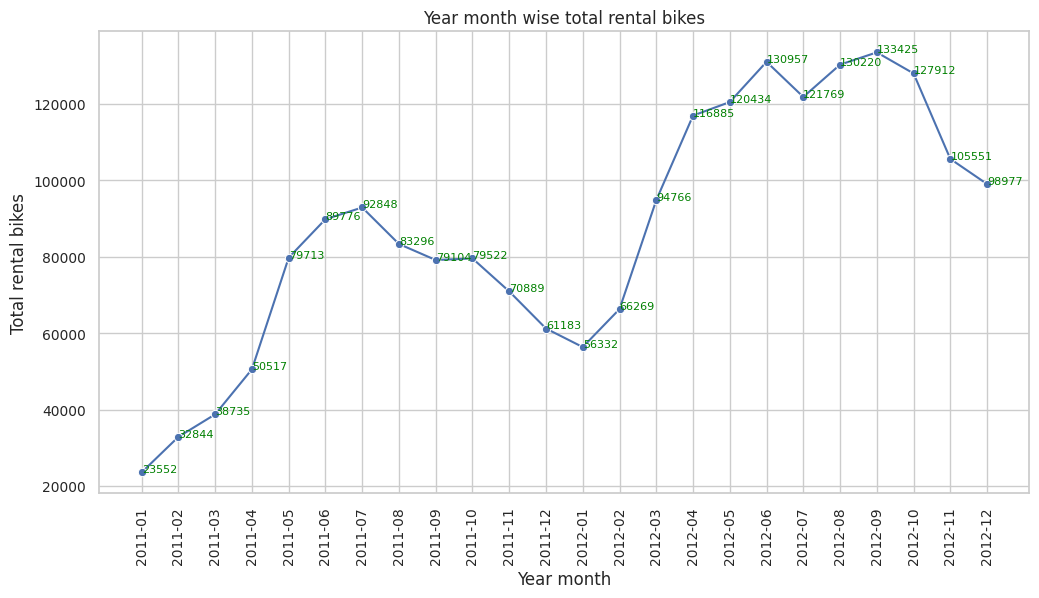

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=data.groupby("year_month")['count'].sum().index,
                 y=data.groupby("year_month")['count'].sum().values,
                  marker = 'o')
for x, y in zip(data.groupby("year_month")['count'].sum().index, data.groupby("year_month")['count'].sum().values):
  plt.text(x ,y , s='{:.0f}'.format(y), fontsize=8, color = 'green')
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Year month wise total rental bikes")
plt.xlabel('Year month')
plt.ylabel('Total rental bikes')
plt.show()

🎯 We could see, In the month of 2012-09 (September 2012) most of users took rented bikes

🎯 In the month of 2011-01 (January 2011) less number of users took rented bikes

🎯 Comparatively, Year wise number of rental bike use is increased i.e. In year 2012 rental bike use is more than year 2011

In [ ]:
data.groupby("season")['count'].sum()

season
fall      640662
spring    312498
summer    588282
winter    544034
Name: count, dtype: int64

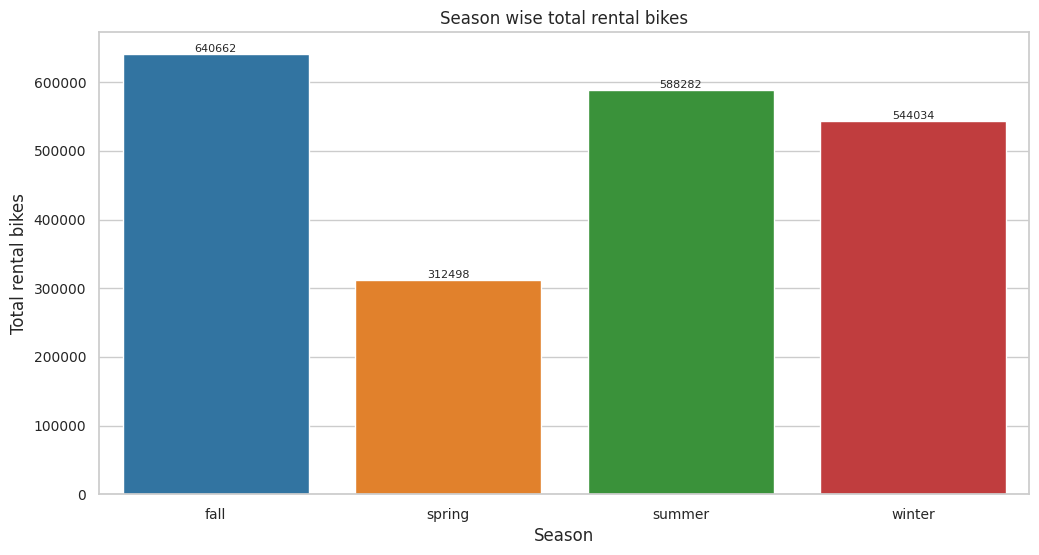

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=data.groupby("season")['count'].sum().index,
                 y=data.groupby("season")['count'].sum().values,
                 palette = 'tab10')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Season wise total rental bikes")
plt.xlabel('Season')
plt.ylabel('Total rental bikes')
plt.show()

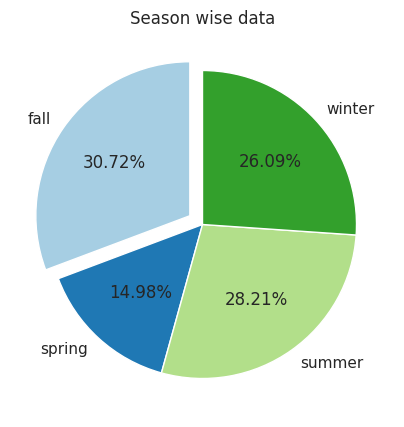

In [ ]:
data_pie = data.groupby('season')['count'].sum().rename_axis('season').reset_index(name='season_count')
plt.figure(figsize=(5,5))
plt.pie(data_pie.season_count,
       labels=data_pie.season,
       startangle=90,
       explode=(0.1,0,0,0),
       autopct = '%.2f%%',
       colors=sns.color_palette('Paired'))
plt.title('Season wise data')
plt.show()

🎯 We could see, In Fall season most of users took rented bikes compared to other season i.e. 30.72 % total bikes rented

🎯 In Spring season least of users took rented bikes compared to other season i.e. approximately 15 % total bikes rented

In [ ]:
data.groupby("weather")['count'].sum()

weather
Clear, Few clouds, partly cloudy, partly cloudy                                            1476063
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                     164
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     102089
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                507160
Name: count, dtype: int64

In [ ]:
weather_data = data.groupby("weather")['count'].sum()

In [ ]:
weather_data

weather
Clear, Few clouds, partly cloudy, partly cloudy                                            1476063
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                     164
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     102089
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                507160
Name: count, dtype: int64

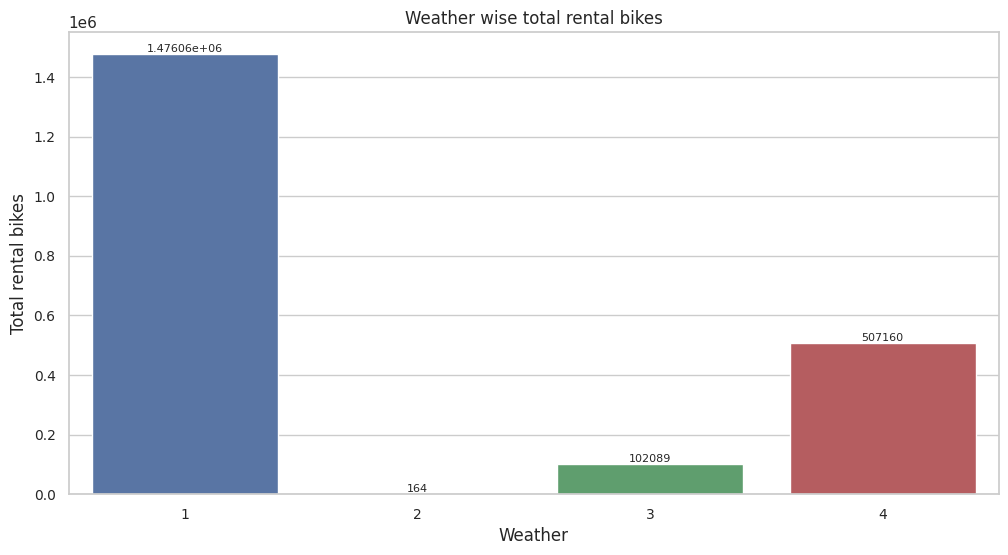

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=weather_data.index,
                 y=weather_data.values,
                 hue = weather_data.index)
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
columns = [1,2,3,4]
ax.set_xticklabels(columns)
plt.title("Weather wise total rental bikes")
plt.xlabel('Weather')
plt.ylabel('Total rental bikes')
plt.show()

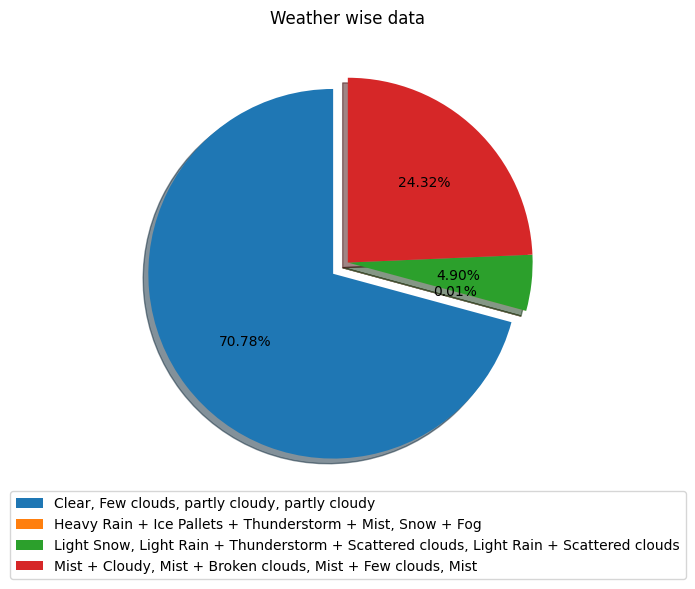

In [ ]:
plt.figure(figsize=(8,6))
labels = weather_data.index
sizes = weather_data.values
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode = explode, autopct ='%.2f%%',
		shadow = True, startangle = 90)
plt.title('Weather wise data')
plt.legend(weather_data.index, bbox_to_anchor =(0.5,-0.20), loc='lower center')
plt.show()

🎯 When weather is Clear, Few clouds, partly cloudy, partly cloudy most of users took rented bikes compared to other weather i.e. 70.78 % total bikes rented

🎯 Approximately none of the user wants to take rental bike when weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## 🤔 "Holiday" and "Working Day" are categorical column or a Numerical column?

- It is represented using Numbers 0 & 1 but the meaning behind this column is actually categorical.
- So in this column, we have values like:
  - 0 ( representing no holiday and not a working day)
  - 1 ( representing a day is holiday and neither weekend nor holiday)

H0 : Holiday and Working day are independent

Ha : Holiday and Working day are not independent

In [ ]:
from scipy.stats import chi2_contingency

stats, pvalue, *_ = chi2_contingency(pd.crosstab(data['holiday'], data['workingday']))
print("chi_stat:",stats)
print("p_value:",pvalue)

chi_stat: 679.8303606566715
p_value: 7.274717892533614e-150


- Confidence level 95%

In [ ]:
alpha = 0.05

if pvalue < alpha:
    print("Reject H0")
    print("Holiday and Working day are not independent")
else:
    print("Fail to reject H0")
    print("Holiday and Working day are independent")

Reject H0
Holiday and Working day are not independent


- As we can see p-value is very very low which is $7.27 *10e^{-150} $  

- It means we **reject the null hypothesis** : Holiday and Working day are **not independent**. They both are dependent on each other.

In [ ]:
data_num.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
data_num.drop(['holiday','workingday'],axis=1,inplace=True)
data_num.head()

,temp,atemp,humidity,windspeed,casual,registered,count
0,9.84,14.395,81,0.0,3,13,16
1,9.02,13.635,80,0.0,8,32,40
2,9.02,13.635,80,0.0,5,27,32
3,9.84,14.395,75,0.0,3,10,13
4,9.84,14.395,75,0.0,0,1,1


In [ ]:
data_num.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


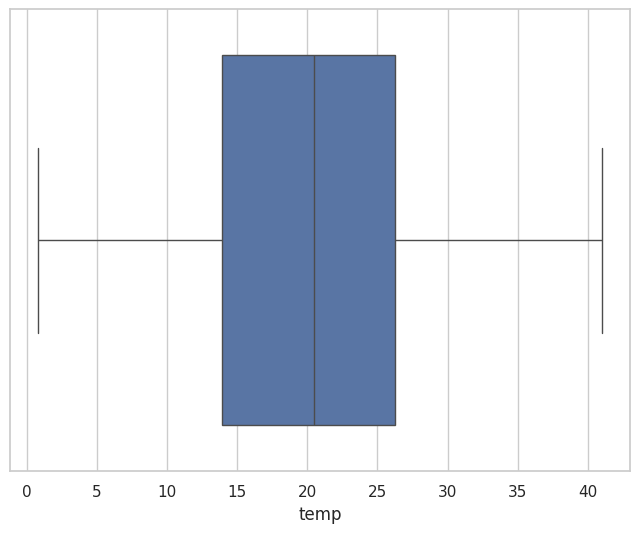

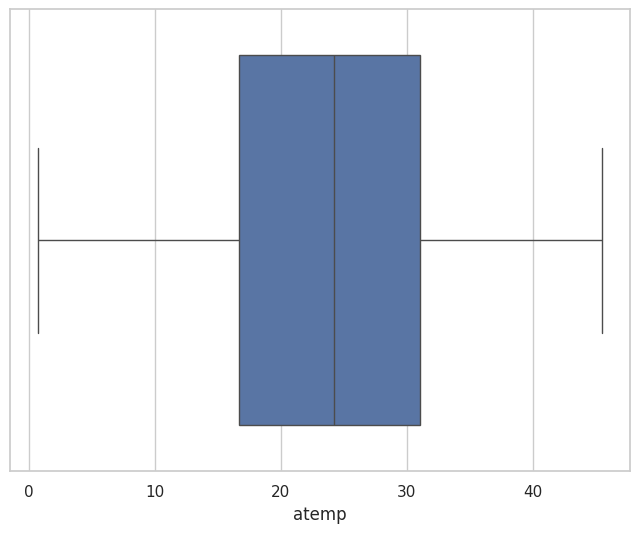

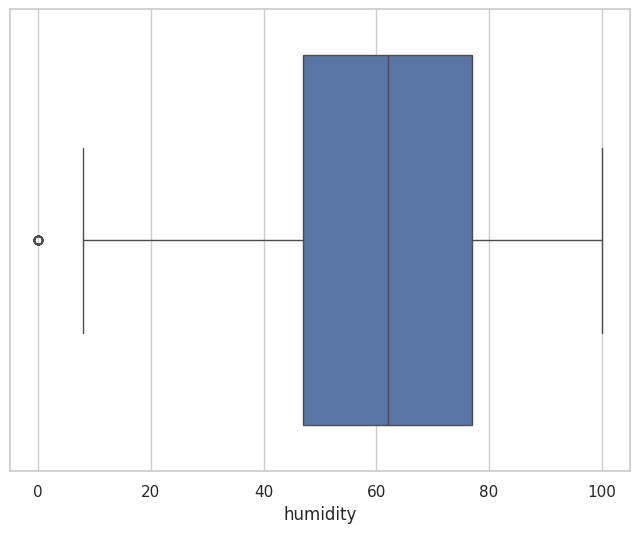

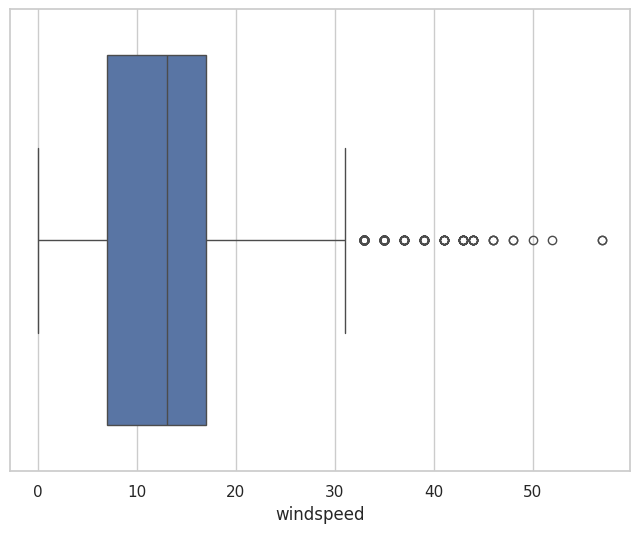

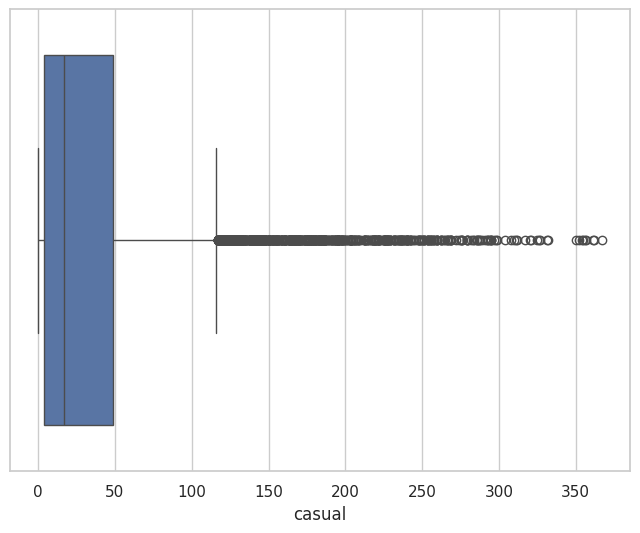

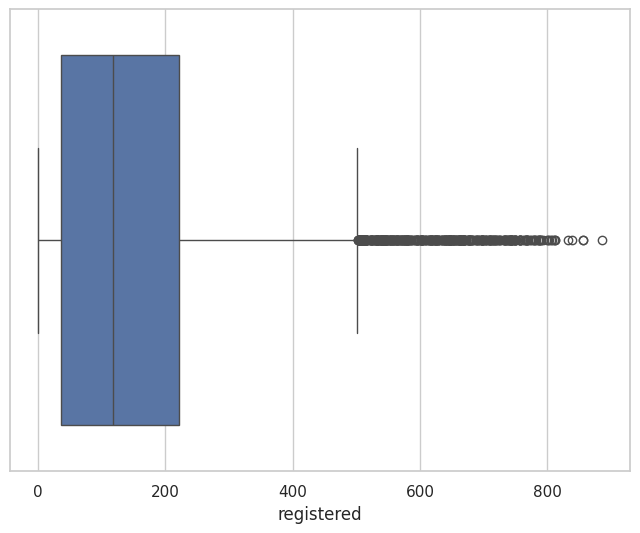

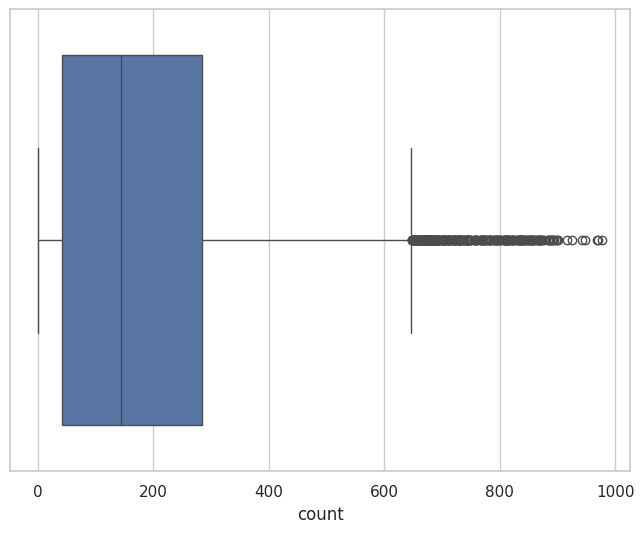

In [ ]:
for col in enumerate(data_num):
  plt.figure(figsize=(8,6))
  sns.boxplot(x=col[1],data=data_num)
  plt.show()

🎯 From the above plots, we can see that there are outliers present in the data.

🎯 To treat the outliers, Calculating the IQR (the difference between the 75th and 25th percentiles) and remove values outside a specified range (e.g., 1.5 times IQR)

In [ ]:
# First quartile
Q1 = data_num.quantile(0.25)

# Third quartile
Q3 = data_num.quantile(0.75)

# IQR
IQR = Q3 - Q1

print(IQR)

temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
dtype: float64


In [ ]:
data.shape

(10886, 13)

The shape of our dataset is (10886, 12), which means it contains 10886 rows and 12 columns.

In [ ]:
data_iqr = data[~((data.iloc[:,1:]< (Q1-1.5*IQR))|(data.iloc[:,1:] > (Q3 + 1.5*IQR))).any(axis=1)]

🎯 With the use of IQR, we are cliping the data within lower bound and upper bound i.e. within range of 25 to 75 percentile

🎯 (data < (Q1 - 1.5 * IQR)) checks for values below the lower bound (Q1 - 1.5 * IQR)

🎯 (data < (Q3 + 1.5 * IQR)) checks for values below the lower bound (Q3 + 1.5 * IQR)

In [ ]:
data_iqr.shape

(9518, 13)

After removing the outliers the shape of dataset is (9518, 12), which means it contains 9518 rows and 18 columns.

In [ ]:
data_iqr_num = data_iqr.select_dtypes(include = np.number)
data_iqr_num.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

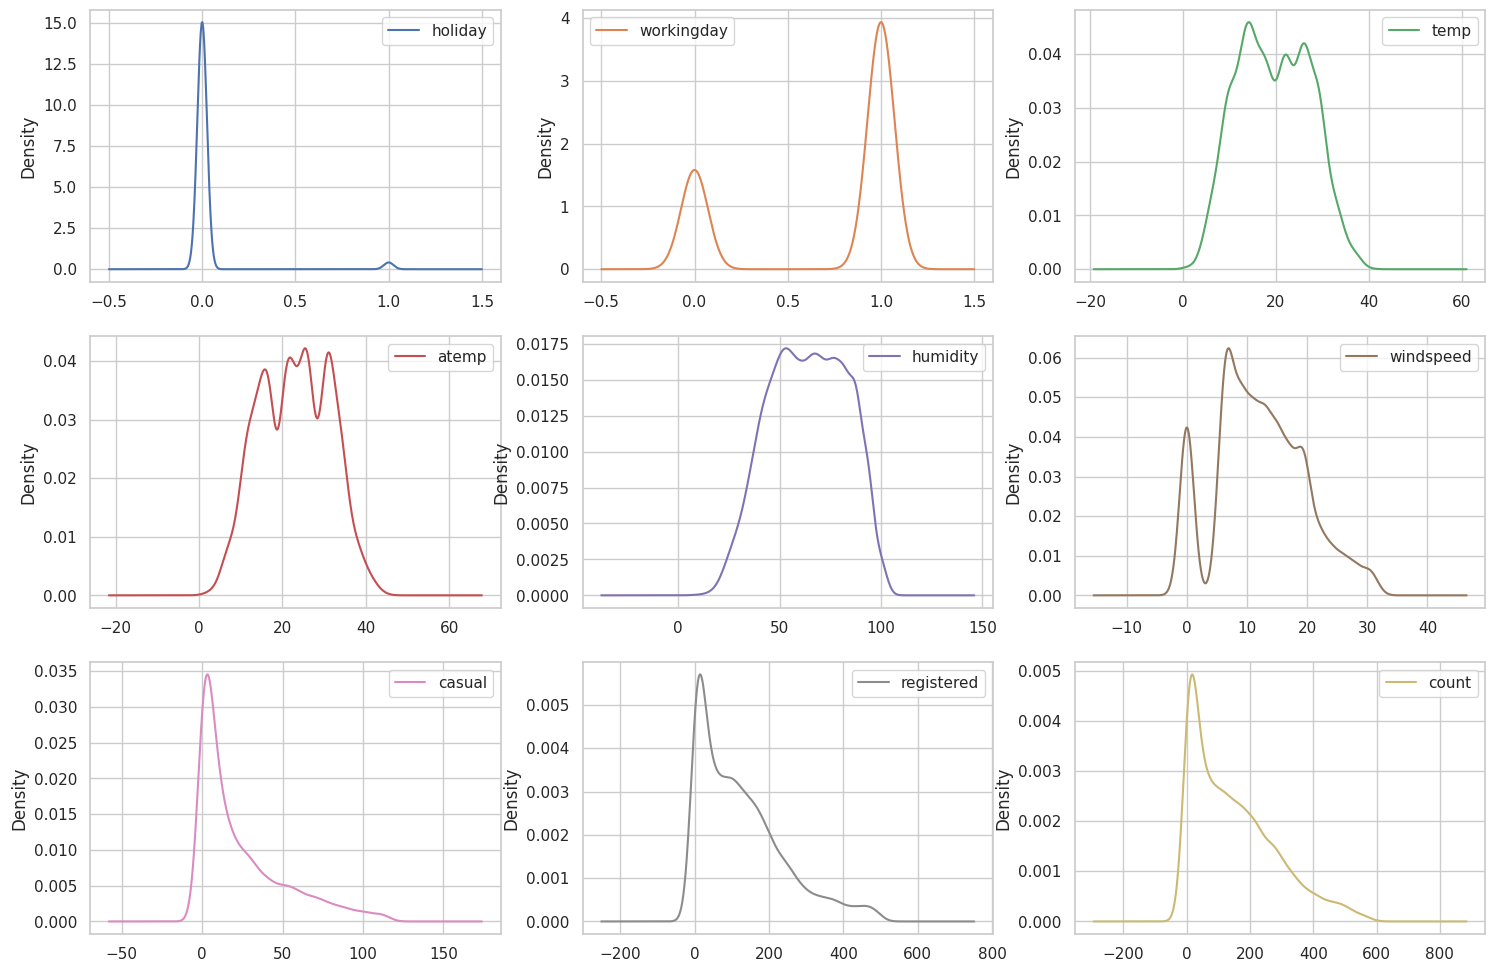

In [ ]:
plt.rcParams["figure.figsize"] = [18,12]
data_iqr_num.plot(kind = 'density', subplots = True, layout = (3, 3), sharex = False)
plt.show()

In [ ]:
data_iqr.skew()

holiday       5.874584
workingday   -0.943955
temp          0.074412
atemp        -0.021164
humidity     -0.104681
windspeed     0.252562
casual        1.346494
registered    1.078217
count         0.892342
dtype: float64

### **By the thumb rule**

1. **Temperature, Feeling Temperature, Humidity and windspeed:**
   -  These thress features have  data evenly spread on both sides of the center, it's like a hill with equal slopes on both sides. We call this "symmetrical" or "no skewness.

2. **Holiday, Casual, Registered and Count:**
   -  For this feature, most of the data is on the left side (lower values) and a long tail extends to the right (higher values), it's like a hill that's steeper on the left and has a long, gentle slope on the right.

3. **Working day:**
   - This feature has negative skewness. most of the data is on the right side (higher values) and a long tail extends to the left (lower values), it's like a hill that's steeper on the right and has a long, gentle slope on the left.

In [ ]:
data_iqr.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
holiday,1.000000,-0.261234,-0.031790,-0.037103,0.004073,0.024563,0.007967,-0.026439,-0.021297
workingday,-0.261234,1.000000,0.116785,0.111450,-0.079808,0.030800,-0.098455,0.186870,0.141892
temp,-0.031790,0.116785,1.000000,0.986415,-0.012123,-0.017049,0.515266,0.276560,0.345398
atemp,-0.037103,0.111450,0.986415,1.000000,0.006011,-0.058533,0.508335,0.273281,0.341134
humidity,0.004073,-0.079808,-0.012123,0.006011,1.000000,-0.302630,-0.335487,-0.262876,-0.296702
windspeed,0.024563,0.030800,-0.017049,-0.058533,-0.302630,1.000000,0.112429,0.109959,0.118392
casual,0.007967,-0.098455,0.515266,0.508335,-0.335487,0.112429,1.000000,0.579577,0.707486
registered,-0.026439,0.186870,0.276560,0.273281,-0.262876,0.109959,0.579577,1.000000,0.985967
count,-0.021297,0.141892,0.345398,0.341134,-0.296702,0.118392,0.707486,0.985967,1.000000


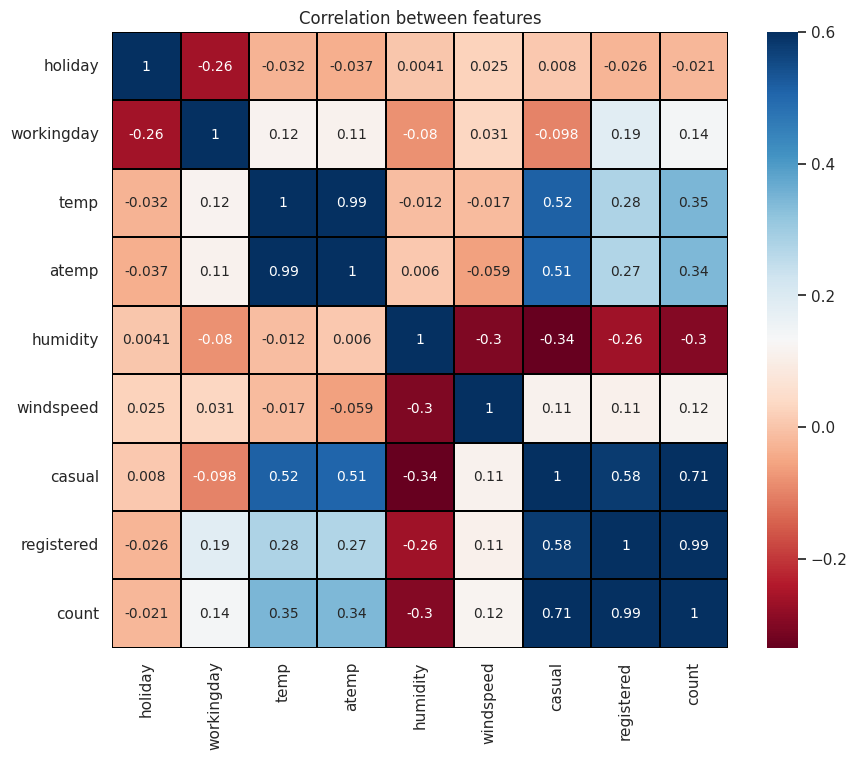

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))
correlation_values = data_iqr.corr()
sns.heatmap(correlation_values, vmax = .6, linewidths=0.01, square=True, annot=True, cmap="RdBu", linecolor="black", annot_kws={"size": 10})
plt.title('Correlation between features')
plt.show()

🎯 We are using HeatMap, it is basically a matrix of correlations and plots rectangular data as a colour-encoded matrix.

🎯 The stronger the colour, the stronger the correlation between the variables

🎯 It indicate the value of the correlation coefficient between the two variables

🎯 Diagonal values are all **1** because they represent correlation between the same variable

🎯 For all other pairs of variables, we can check the correlation coefficient by both value and colour intensity

## Observations based on the above HeatMap:

**Positive Correlations:**

1. **Temperature and Feeling Temperature:** temperature increases, feeling temperature also tends to increase. This strong positive correlation (0.99) indicates that temperature is helps to get about feeling temperature.
2. **Casual and registered with count:** Casual and Registered users total is same as count. This suggests a potential connection between their functionalities.

**Negative Correlations:**

1. **Windspped and Humidity:** As the windspeed increases, humidity get decrease significantly (correlation of -0.37).
2. **Casual and Registered with Humidity:** Increase in humidity tends to users(correlation of -0.3).

**No Correlation (or Very Low):**

1. **Casual and Holiday:** Holiday and casual user have almost no correlation (coefficient of 0.008).
2. **Humidity and holiday:** The correlation between humidity and holiday is 0.0041. This value is very close to zero.


🎯 Features that are perfectly correlated to each other, with a correlation coefficient of one or minus one, bring no new information to a dataset but do add to the complexity. So naturally, we would want to drop one of the two features that hold the same information.

In [ ]:
data_iqr.corr().abs()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
holiday,1.000000,0.261234,0.031790,0.037103,0.004073,0.024563,0.007967,0.026439,0.021297
workingday,0.261234,1.000000,0.116785,0.111450,0.079808,0.030800,0.098455,0.186870,0.141892
temp,0.031790,0.116785,1.000000,0.986415,0.012123,0.017049,0.515266,0.276560,0.345398
atemp,0.037103,0.111450,0.986415,1.000000,0.006011,0.058533,0.508335,0.273281,0.341134
humidity,0.004073,0.079808,0.012123,0.006011,1.000000,0.302630,0.335487,0.262876,0.296702
windspeed,0.024563,0.030800,0.017049,0.058533,0.302630,1.000000,0.112429,0.109959,0.118392
casual,0.007967,0.098455,0.515266,0.508335,0.335487,0.112429,1.000000,0.579577,0.707486
registered,0.026439,0.186870,0.276560,0.273281,0.262876,0.109959,0.579577,1.000000,0.985967
count,0.021297,0.141892,0.345398,0.341134,0.296702,0.118392,0.707486,0.985967,1.000000


🎯 Absolute value of all the correlation

In [ ]:
np.triu(np.ones_like(data_iqr.corr().abs(), dtype=bool))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

🎯 Correlation matrix and take the absolute values of that, to also filter out strong negative correlations. Then create a mask for the upper triangle of the dataset just like we did when we were visualizing the correlation matrix.

In [ ]:
data_iqr.corr().abs().mask(np.triu(np.ones_like(data_iqr.corr().abs(), dtype=bool)))

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,0.261234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,0.031790,0.116785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atemp,0.037103,0.111450,0.986415,NaN,NaN,NaN,NaN,NaN,NaN
humidity,0.004073,0.079808,0.012123,0.006011,NaN,NaN,NaN,NaN,NaN
windspeed,0.024563,0.030800,0.017049,0.058533,0.302630,NaN,NaN,NaN,NaN
casual,0.007967,0.098455,0.515266,0.508335,0.335487,0.112429,NaN,NaN,NaN
registered,0.026439,0.186870,0.276560,0.273281,0.262876,0.109959,0.579577,NaN,NaN
count,0.021297,0.141892,0.345398,0.341134,0.296702,0.118392,0.707486,0.985967,NaN


🎯 When we pass this mask it will replace all positions in the DataFrame where the mask has a True value with NA.

In [ ]:
corr_matrix = data_iqr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
data_iqr.drop(to_drop, axis=1, inplace=True)

🎯 With help list comprehension, We got all columns that have a correlation to any feature stronger than the threshold value. The reason we used the mask to set half of the matrix to NA values is that we want to avoid removing both features when they have a strong correlation. Finally we drop the selected features from the DataFrame.

In [ ]:
data_iqr

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,year_month
0,2011-01-01 00:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,81,0.0000,3,13,2011-01
1,2011-01-01 01:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,80,0.0000,8,32,2011-01
2,2011-01-01 02:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,80,0.0000,5,27,2011-01
3,2011-01-01 03:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,75,0.0000,3,10,2011-01
4,2011-01-01 04:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,75,0.0000,0,1,2011-01
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,"Clear, Few clouds, partly cloudy, partly cloudy",15.58,50,26.0027,7,329,2012-12
10882,2012-12-19 20:00:00,winter,0,1,"Clear, Few clouds, partly cloudy, partly cloudy",14.76,57,15.0013,10,231,2012-12
10883,2012-12-19 21:00:00,winter,0,1,"Clear, Few clouds, partly cloudy, partly cloudy",13.94,61,15.0013,4,164,2012-12
10884,2012-12-19 22:00:00,winter,0,1,"Clear, Few clouds, partly cloudy, partly cloudy",13.94,61,6.0032,12,117,2012-12


In [ ]:
data_iqr['total'] = data_iqr['registered'] + data_iqr['casual']

🎯 Created a new column of total number of rented bikes from addition of registered and casual columns

In [ ]:
data_iqr

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,year_month,total
0,2011-01-01 00:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,81,0.0000,3,13,2011-01,16
1,2011-01-01 01:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,80,0.0000,8,32,2011-01,40
2,2011-01-01 02:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,80,0.0000,5,27,2011-01,32
3,2011-01-01 03:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,75,0.0000,3,10,2011-01,13
4,2011-01-01 04:00:00,spring,0,0,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,75,0.0000,0,1,2011-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,"Clear, Few clouds, partly cloudy, partly cloudy",15.58,50,26.0027,7,329,2012-12,336
10882,2012-12-19 20:00:00,winter,0,1,"Clear, Few clouds, partly cloudy, partly cloudy",14.76,57,15.0013,10,231,2012-12,241
10883,2012-12-19 21:00:00,winter,0,1,"Clear, Few clouds, partly cloudy, partly cloudy",13.94,61,15.0013,4,164,2012-12,168
10884,2012-12-19 22:00:00,winter,0,1,"Clear, Few clouds, partly cloudy, partly cloudy",13.94,61,6.0032,12,117,2012-12,129


## Working Day has an effect on the number of electric cycles rented❓
- #### Null and alternate hypothesis

>- H0 : Working Day not have any effect on the number of electric cycles rented.
>- Ha : Working Day have some effect on the number of electric cycles rented.

- #### Hypothesis Test :- 2- Sample T-Test
- #### Significance level :- 5%

[]

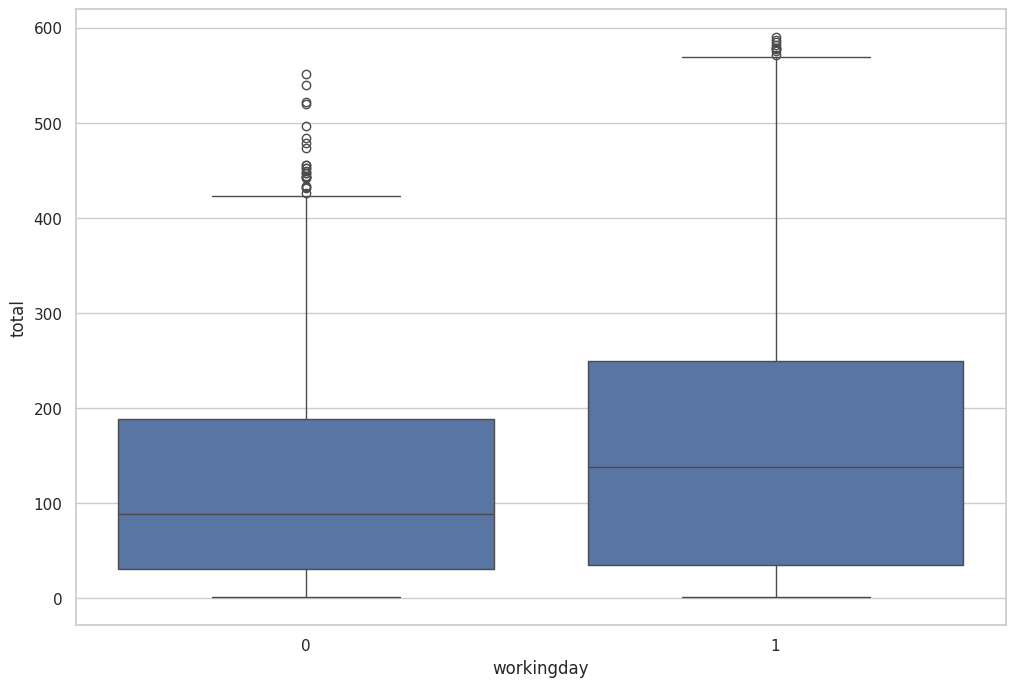

In [ ]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = data_iqr, x = 'workingday', y = 'total')
plt.plot()

 - $H_0$: Working Day not have any effect on the number of electric cycles rented.
 - $H_a$: Working Day have some effect on the number of electric cycles rented.

In [ ]:
data_iqr.loc[data_iqr['workingday']==0, 'total']

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: total, Length: 2728, dtype: int64

In [ ]:
working_day = data_iqr.loc[data_iqr['workingday']==1, 'total']
non_working_day = data_iqr.loc[data_iqr['workingday']==0, 'total']

t_stat, pvalue = ttest_ind(working_day, non_working_day)
print("Statistics:",t_stat)
print("P-value:",pvalue)

alpha = 0.05

if pvalue < alpha:
  print('Reject H0, Working Day have some effect on the number of electric cycles rented.')
else:
  print ('Fail to Reject H0, Working Day not have any effect on the number of electric cycles rented.')

Statistics: 13.983019373271851
P-value: 5.384896180235767e-44
Reject H0, Working Day have some effect on the number of electric cycles rented.


🎯 There is some effect of Working day compare to Non-working day

🎯 On Working day, User prefer to use electric rental cycles for transportation purpose

## Check whether No. of electric cycles rented is similar or different in different weather❓
- #### Null and alternate hypothesis

 - $H_0$: No. of electric cycles rented in different weather is same
 - $H_a$:  No. of electric cycles rented in at least one of the weather is different

- #### Hypothesis Test :- ANNOVA
- #### Significance level :- 5%

In [ ]:
data_iqr['weather'].unique()

array(['Clear, Few clouds, partly cloudy, partly cloudy',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'],
      dtype=object)

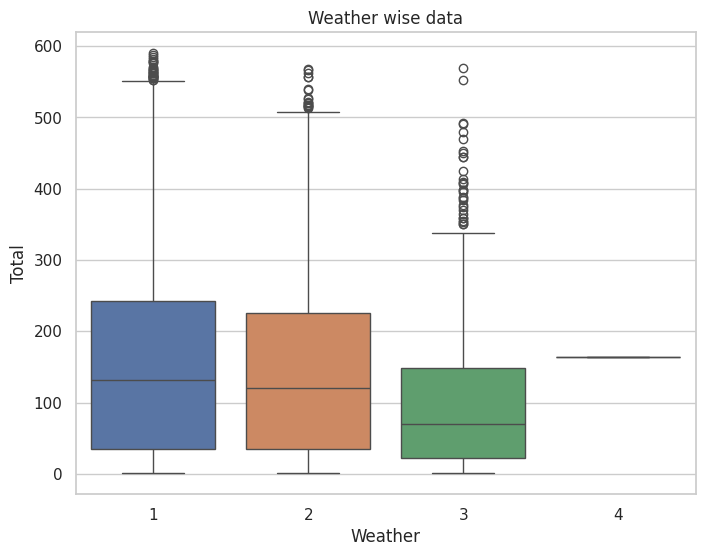

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'weather', y = 'total', data = data_iqr, hue = 'weather')
plt.title('Weather wise data')
plt.xticks([0, 1, 2, 3], [1, 2, 3, 4])
plt.xlabel('Weather')
plt.ylabel('Total')
plt.show()

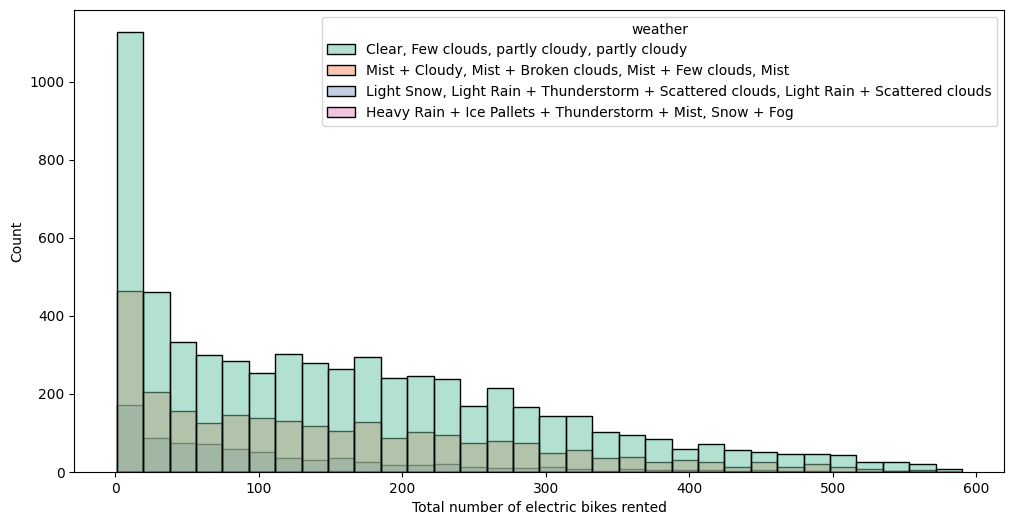

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=data_iqr, x="total", hue="weather", palette='Set2')
plt.xlabel('Total number of electric bikes rented')
plt.show()

In [ ]:
clear_weather = data_iqr[data_iqr["weather"]=='Clear, Few clouds, partly cloudy, partly cloudy']["total"]
mist_weather = data_iqr[data_iqr["weather"]=='Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist']["total"]
snow_weather = data_iqr[data_iqr["weather"]=='Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']["total"]
rainy_weather = data_iqr[data_iqr["weather"]=='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']["total"]

[]

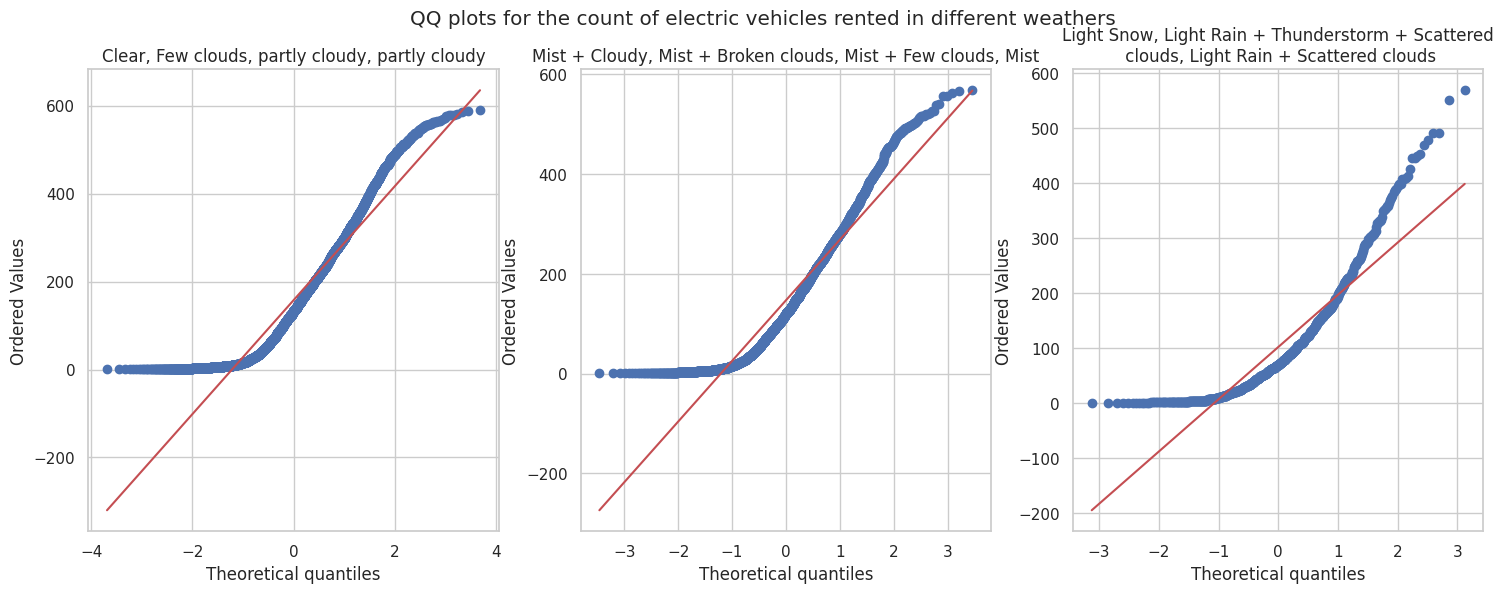

In [ ]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
stats.probplot(clear_weather, plot = plt, dist = 'norm')
plt.title('Clear, Few clouds, partly cloudy, partly cloudy')
plt.subplot(1, 3, 2)
stats.probplot(mist_weather, plot = plt, dist = 'norm')
plt.title('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist')
plt.subplot(1, 3, 3)
stats.probplot(snow_weather, plot = plt, dist = 'norm')
plt.title('Light Snow, Light Rain + Thunderstorm + Scattered\n clouds, Light Rain + Scattered clouds')
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

- Applying Shapiro-Wilk test for normality
>- H0 : Data is Gaussian
>- Ha : Data is not Gaussian

Test Statistics : **Shapiro-Wilk test for normality**

In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(clear_weather)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

0.0
Reject H0
Data is not Gaussian


In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(mist_weather)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

2.1035535621065664e-36
Reject H0
Data is not Gaussian


In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(snow_weather)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

7.518643302497174e-27
Reject H0
Data is not Gaussian


In [ ]:
from scipy.stats import levene # Test variance

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(clear_weather, mist_weather, snow_weather)
if p_value < 0.05:
  print("Variances are not equal")
else:
  print("Variances are equal")

Variances are not equal


In [ ]:
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical
from statsmodels.graphics.gofplots import qqplot

f_stats, p_value = f_oneway(clear_weather, mist_weather, snow_weather)

print("test statistic:",f_stats)
print("p_value:",p_value)

if p_value < 0.05:
    print("Reject H0")
    print("No. of electric cycles rented in at least one of the weather is different")
else:
    print("Fail to reject H0")
    print("No. of electric cycles rented in different weather is same")

test statistic: 62.70255115766609
p_value: 8.841710069607572e-28
Reject H0
No. of electric cycles rented in at least one of the weather is different


🎯 There are number of electric cycles rented in at least one of the weather is different

## Check whether No. of cycles rented similar or different in different seasons❓
- #### Null and alternate hypothesis

 - $H_0$: No. of electric cycles rented in different seasons is same
 - $H_a$:  No. of electric cycles rented in at least one of the season is different

- #### Hypothesis Test :- ANNOVA
- #### Significance level :- 5%

In [ ]:
data_iqr['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

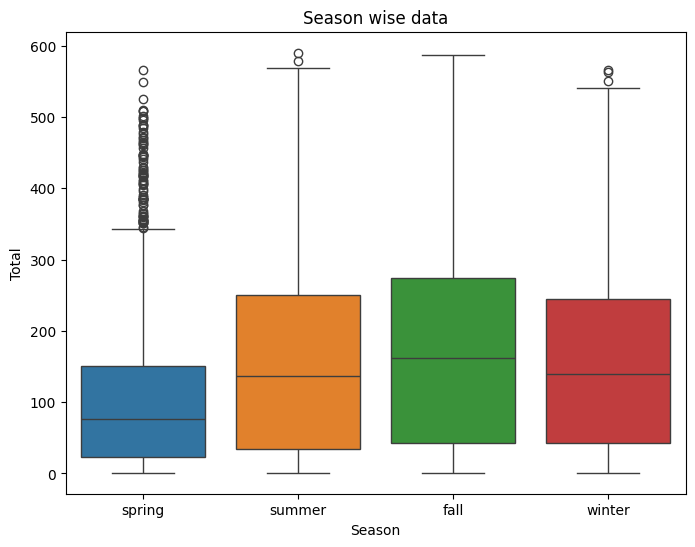

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'season', y = 'total', data = data_iqr, hue = 'season')
plt.title('Season wise data')
plt.xlabel('Season')
plt.ylabel('Total')
plt.show()

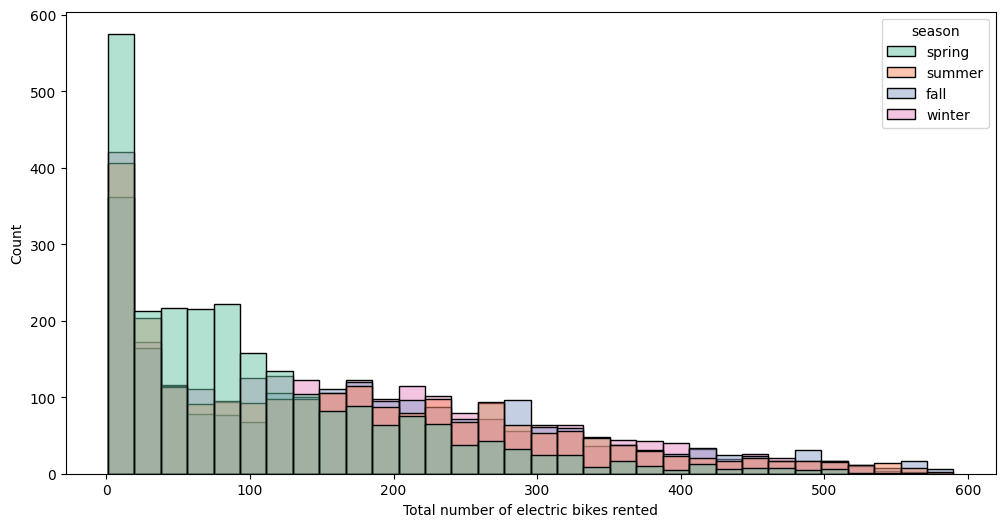

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=data_iqr, x="total", hue="season", palette='Set2')
plt.xlabel('Total number of electric bikes rented')
plt.show()

In [ ]:
spring_season = data_iqr[data_iqr["season"]=='spring']["total"]
summer_season = data_iqr[data_iqr["season"]=='summer']["total"]
fall_season = data_iqr[data_iqr["season"]=='fall']["total"]
winter_season = data_iqr[data_iqr["season"]=='winter']["total"]

[]

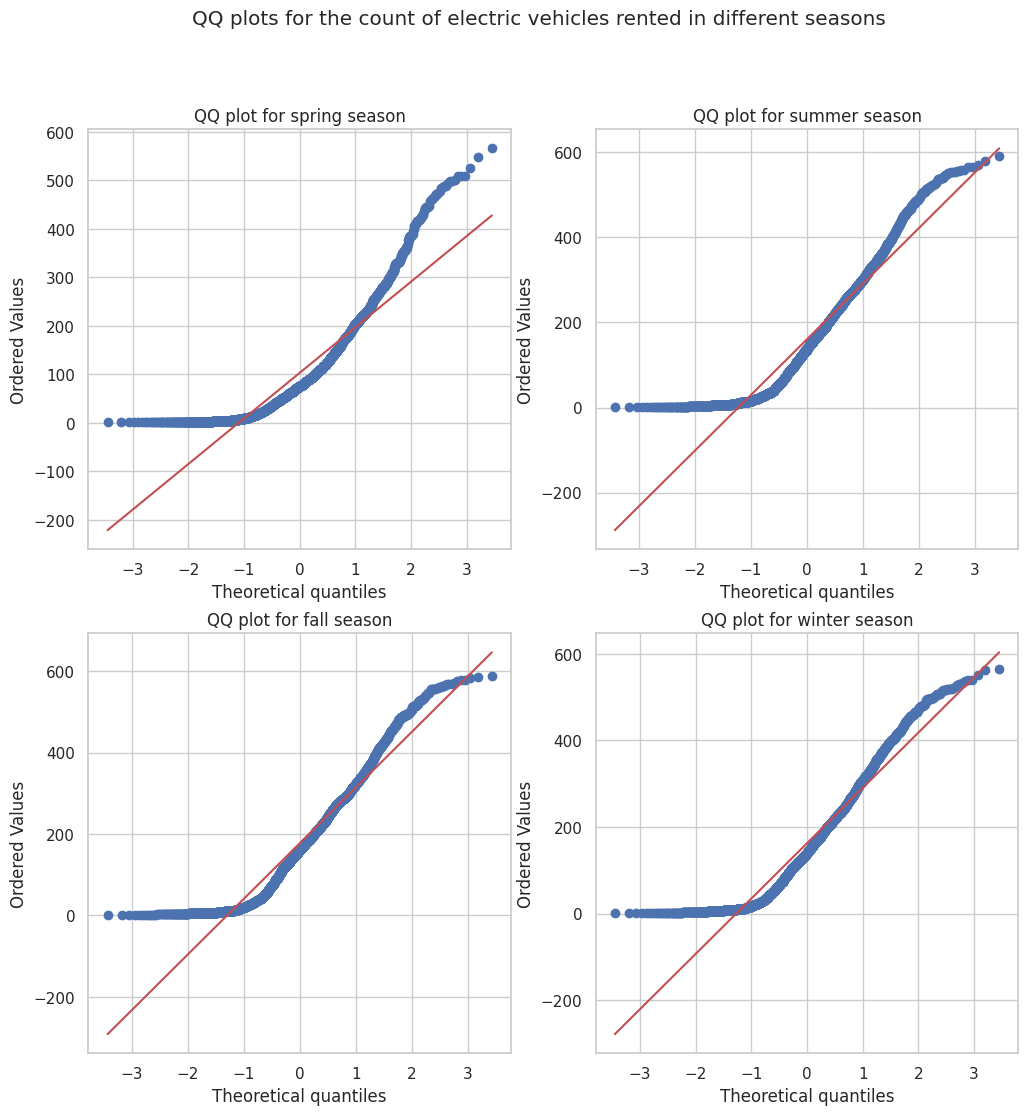

In [ ]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
stats.probplot(spring_season, plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
stats.probplot(summer_season, plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
stats.probplot(fall_season, plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
stats.probplot(winter_season, plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(spring_season)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

2.0725204287364044e-42
Reject H0
Data is not Gaussian


In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(summer_season)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

1.2426929547549821e-33
Reject H0
Data is not Gaussian


In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(fall_season)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

5.115096899524057e-31
Reject H0
Data is not Gaussian


In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(winter_season)
print(p_value)

if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

4.5287389233367154e-33
Reject H0
Data is not Gaussian


In [ ]:
from scipy.stats import levene # Test variance

In [ ]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(spring_season, summer_season, fall_season,  winter_season)
if p_value < 0.05:
  print("Variances are not equal")
else:
  print("Variances are equal")

Variances are not equal


In [ ]:
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical
from statsmodels.graphics.gofplots import qqplot

f_stats, p_value = f_oneway(spring_season, summer_season, fall_season,  winter_season)

print("test statistic:",f_stats)
print("p_value:",p_value)

if p_value < 0.05:
    print("Reject H0")
    print("No. of electric cycles rented in at least one of the season is different")
else:
    print("Fail to reject H0")
    print("No. of electric cycles rented in different season is same")

test statistic: 155.83821650550502
p_value: 1.328514170995064e-98
Reject H0
No. of electric cycles rented in at least one of the season is different


🎯 There are number of electric cycles rented in at least one of the season is different

## Check whether Weather is dependent on season❓
- #### Null and alternate hypothesis

 - $H_0$: Weather and Season are independent
 - $H_a$: Weather and Season are dependent

- #### Hypothesis Test :- Chi-square test
- #### Significance level :- 5%

In [ ]:
pd.crosstab(data_iqr['weather'], data_iqr['season'])

season,fall,spring,summer,winter
weather,,,,
"Clear, Few clouds, partly cloudy, partly cloudy",1598,1595,1473,1510
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",0,1,0,0
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",173,184,205,211
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",517,683,614,754


In [ ]:
from scipy.stats import chi2_contingency

stats, pvalue, *_ = chi2_contingency(pd.crosstab(data_iqr['weather'], data_iqr['season']))
print("chi_stat:",stats)
print("p_value:",pvalue)

chi_stat: 49.956607077688595
p_value: 1.0976664201931212e-07


In [ ]:
alpha = 0.05

if pvalue < alpha:
    print("Reject H0")
    print("Weather and Season are dependent")
else:
    print("Fail to reject H0")
    print("Weather and Season are independent")

Reject H0
Weather and Season are dependent


🎯 As we can see p-value is very low which is $1.09 *10e^{-07} $  

🎯 It means we **reject the null hypothesis** : Weather and Season day are **not independent**. They both are dependent on each other.

🎯 Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

 # 🎯 Insights

 - The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
 - Out of every 100 users, around 19 are casual users and 81 are registered users.
 - There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
  - The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
 - More than 80 % of the time, the temperature is less than 28 degrees celcius.
 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
 - More than 85 % of the total, windspeed data has a value of less than 20.
 - The mean count of the total rental bikes is statistically similar for both working and non-working days.
 - There is statistically significant dependency of weather and season total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different weathers.
 - There is no statistically significant dependency of weather 1, 2, 3 on season total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different seasons.

 # 🎯 Recommendations

 - **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

 - **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

 - **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

 - **Improve Weather Data Collection**: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

 - **Customer Comfort**: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

 - **Collaborations with Weather Services**: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

 - **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

 - **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

 - **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

 - **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.
